In [162]:
import pandas as pd
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import pypfopt
import cvxpy as cp


In [75]:
df = pd.read_csv('/Users/filipporonzino/Downloads/datasetlabel.csv')

In [76]:
# drop na for ret column
df = df.dropna(subset=['ret'])

In [77]:
df.columns

Index(['permno', 'CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi',
       'pe_inc', 'ps', 'pcf', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm',
       'roa', 'roe', 'roce', 'aftret_eq', 'aftret_invcapx', 'aftret_equity',
       'GProf', 'equity_invcap', 'debt_invcap', 'totdebt_invcap',
       'capital_ratio', 'cash_lt', 'debt_at', 'debt_ebitda', 'short_debt',
       'lt_debt', 'cash_debt', 'fcf_ocf', 'lt_ppent', 'dltt_be', 'debt_assets',
       'debt_capital', 'de_ratio', 'at_turn', 'rect_turn', 'pay_turn',
       'sale_invcap', 'sale_equity', 'rd_sale', 'adv_sale', 'staff_sale',
       'accrual', 'ptb', 'divyield', 'date', 'prc', 'vol', 'ret', 'retx',
       'mktcap', 'prc_adj', 'naics_processed', 'ret_industry_tot',
       'ret_industry_relative', 'MACD_index', 'rsi', 'stat_divyeld', 'target'],
      dtype='object')

In [108]:
from enum import unique


list(df['permno'].values)
print(df['permno'].unique())

[10078 10104 10107 10137 10138 10145 10147 10225 10299 10324 10516 10696
 10909 11081 11308 11403 11404 11533 11552 11600 11618 11674 11703 11754
 11762 11786 11850 11891 11896 11955 11976 12052 12060 12062 12067 12073
 12140 12308 12369 12431 12448 12449 12456 12476 12490 12558 12570 12622
 12623 12650 12872 12981 13035 13141 13168 13210 13323 13356 13407 13447
 13511 13567 13598 13641 13688 13721 13788 13856 13901 13911 13928 13936
 13949 13963 13983 14008 14295 14338 14541 14579 14593 14601 14656 14702
 14714 14763 14776 14882 14889 14939 15069 15202 15272 15291 15401 15404
 15408 15456 15488 15553 15560 15579 15707 15720 15797 15850 16044 16087
 16276 16279 16343 16347 16431 16432 16544 16600 16678 16692 16816 16851
 17005 17144 17279 17478 17700 17743 17750 17783 17830 17942 18065 18142
 18163 18312 18327 18403 18411 18420 18428 18542 18576 18578 18592 18729
 19166 19285 19286 19350 19393 19502 19561 19807 20057 20190 20220 20415
 20482 20626 21020 21124 21178 21186 21207 21371 21

In [79]:
# create subset of dates filtering by permno
df_10078 = df[df['permno'] == 10078]
# Drop all columns except date
df_10078.columns 
df_10078 = df_10078[['date', 'prc_adj']]

In [109]:
df_93436 = df[df['permno'] == 10104]
# Drop all columns except date
print(df_93436.columns )
df_93436 = df_93436[['date', 'prc_adj']]
print(df_93436)

Index(['permno', 'CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi',
       'pe_inc', 'ps', 'pcf', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm',
       'roa', 'roe', 'roce', 'aftret_eq', 'aftret_invcapx', 'aftret_equity',
       'GProf', 'equity_invcap', 'debt_invcap', 'totdebt_invcap',
       'capital_ratio', 'cash_lt', 'debt_at', 'debt_ebitda', 'short_debt',
       'lt_debt', 'cash_debt', 'fcf_ocf', 'lt_ppent', 'dltt_be', 'debt_assets',
       'debt_capital', 'de_ratio', 'at_turn', 'rect_turn', 'pay_turn',
       'sale_invcap', 'sale_equity', 'rd_sale', 'adv_sale', 'staff_sale',
       'accrual', 'ptb', 'divyield', 'date', 'prc', 'vol', 'ret', 'retx',
       'mktcap', 'prc_adj', 'naics_processed', 'ret_industry_tot',
       'ret_industry_relative', 'MACD_index', 'rsi', 'stat_divyeld', 'target'],
      dtype='object')
            date    prc_adj
2402  2000-06-27   9.795552
2403  2000-06-28  12.022602
2404  2000-06-29  11.396186
2405  2000-06-30  11.755384
2406  2000-07-03  10

In [119]:
# merge them by date
df_merged = df_10078.merge(df_93436, on='date', how='inner')

In [120]:
df_merged.head()

,date,prc_adj_x,prc_adj_y
0,2000-07-07,64.491355,6.750276
1,2000-07-10,68.890169,10.168567
2,2000-07-11,74.272210,10.194193
3,2000-07-12,76.452780,9.399446
4,2000-07-13,71.963370,8.901377


<Axes: >

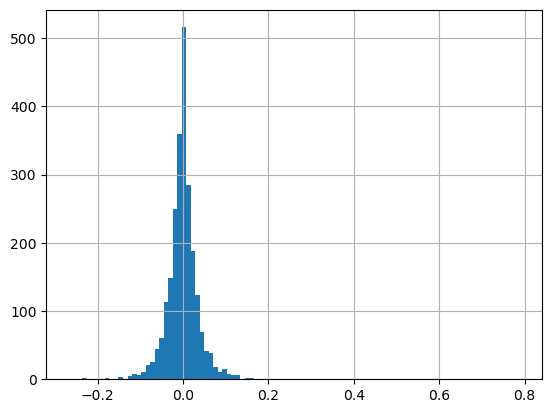

In [82]:
# Now we want the histogram of returns of a certain permno
df['ret'][df['permno'] == 10078].hist(bins=100)

In [83]:
# I want now a kde estimation of the histogram


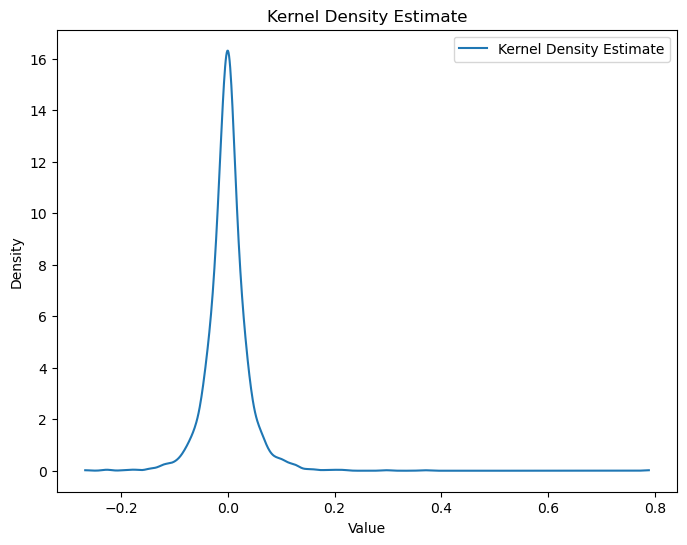

In [84]:
# Compute kernel density estimate
subset_df = df[df['permno'] == 10078]
onestock = subset_df['ret']

kde = gaussian_kde(onestock)

# Evaluate the KDE at specific points
# For example, to evaluate at x=0.5
# Generate points to evaluate the KDE
x = np.linspace(onestock.min(), onestock.max(), 1000)

# Evaluate the KDE at these points
kde_values = kde(x)

# Plot the kernel density estimate
plt.figure(figsize=(8, 6))
plt.plot(x, kde_values, label='Kernel Density Estimate')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimate')
plt.legend()
plt.show()

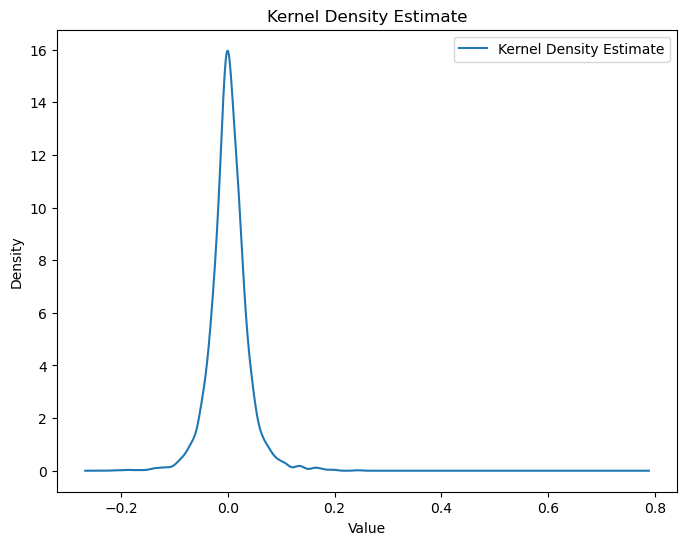

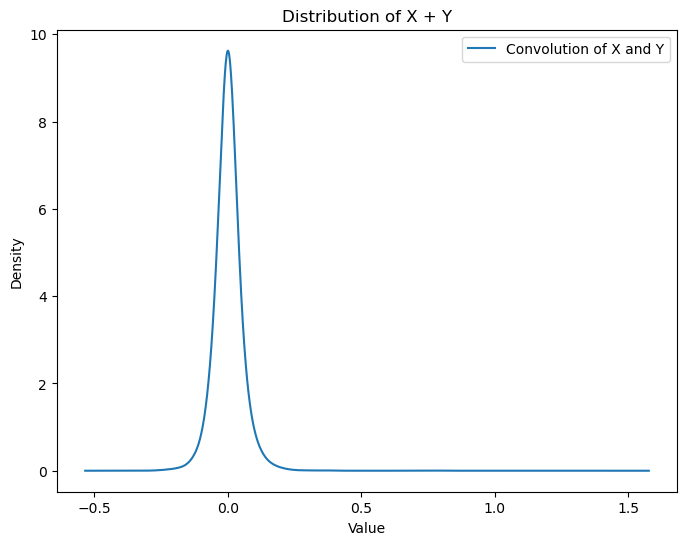

In [85]:
# Compute kernel density estimates for X and Y
subset_df = df[df['permno'] == 93436]
twostock = subset_df['ret']

kde_x = gaussian_kde(onestock)
kde_y = gaussian_kde(twostock)

# Generate points to evaluate the KDE
x = np.linspace(onestock.min(), onestock.max(), 1000)

# Evaluate the KDE at these points
kde_values = kde_y(x)

# Plot the kernel density estimate
plt.figure(figsize=(8, 6))
plt.plot(x, kde_values, label='Kernel Density Estimate')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimate')
plt.legend()
plt.show()


# Generate points to evaluate the convolution
min_val = min(onestock.min(), twostock.min())
max_val = max(onestock.max(), twostock.max())
x = np.linspace(min_val, max_val, 1000)

# Compute the convolution of the kernel density estimates
convolution = np.convolve(kde_x(x), kde_y(x), mode='full') * (max_val - min_val) / len(x)

# Adjust the x values for the resulting distribution
x_conv = np.linspace(2*min_val, 2*max_val, len(convolution))

# Plot the resulting distribution
plt.figure(figsize=(8, 6))
plt.plot(x_conv, convolution, label='Convolution of X and Y')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of X + Y')
plt.legend()
plt.show()

In [86]:
print(np.isnan(kde_x(x)).any())
print(np.isnan(kde_y(x)).any())

False
False


In [87]:
df_10078.head()

,date,prc_adj
0,2000-07-07,64.491355
1,2000-07-10,68.890169
2,2000-07-11,74.272210
3,2000-07-12,76.452780
4,2000-07-13,71.963370


In [113]:
df_merged.head()

,date,prc_adj_x,prc_adj_y
0,2000-07-07,64.491355,6.750276
1,2000-07-10,68.890169,10.168567
2,2000-07-11,74.272210,10.194193
3,2000-07-12,76.452780,9.399446
4,2000-07-13,71.963370,8.901377


In [137]:
from pypfopt.expected_returns import mean_historical_return

In [171]:
# Concatenate KDEs
min_val = min(onestock.min(), twostock.min())
max_val = max(onestock.max(), twostock.max())
x = np.linspace(min_val, max_val, 1000)
kde_combined = lambda x: (kde_x(x) + kde_y(x)) / 2
# Compute entropy of the kernel density estimates
def compute_entropy(kde):
    density = kde(x)
    # Set very small values to a small positive value to avoid NaN in log calculation
    density[density < 1e-10] = 1e-10
    return -np.sum(density * np.log(density))

entropy_x = compute_entropy(kde_x)
entropy_y = compute_entropy(kde_y)

print("Entropy of stock X:", entropy_x)
print("Entropy of stock Y:", entropy_y)


# Compute covariance matrix
returns = pd.concat([onestock, twostock], axis=1)
cov_matrix = risk_models.sample_cov(returns)
# COnvert ret columns to numeric
# df_merged['prc_adj_x'] = pd.to_numeric(df_merged['prc_adj_x'], errors='coerce')
# df_merged['prc_adj_y'] = pd.to_numeric(df_merged['prc_adj_y'], errors='coerce')
# Set the date as index
# df_merged['date'] = pd.to_datetime(df_merged['date'])
# df_merged = df_merged.set_index('date')
mu = mean_historical_return(df_merged)

# Compute efficient frontier
ef = EfficientFrontier(mu, cov_matrix)
ef.add_objective(lambda weights: np.sum(kde_combined(x) * np.log(kde_combined(x))))
#ef.add_objective(cp.entr)

# Optimize for the maximum expected returns while minimizing entropy
#weights = ef.max_sharpe(risk_free_rate=-0.2)
weights = ef.min_volatility()


print("Optimal weights:", weights)

Entropy of stock X: -1835.135874345745
Entropy of stock Y: -1883.3974387558062
Optimal weights: OrderedDict([('XOM', 0.9800406388148174), ('RRC', 0.0199593611851825)])


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/pypfopt/expected_returns.py:56: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna(how="all")


In [127]:
df_merged.head()

,prc_adj_x,prc_adj_y
date,,
2000-07-07,64.491355,6.750276
2000-07-10,68.890169,10.168567
2000-07-11,74.272210,10.194193
2000-07-12,76.452780,9.399446
2000-07-13,71.963370,8.901377


In [130]:
#rename column prc_adj_x to price
df_merged.rename(columns={'prc_adj_x': 'XOM'}, inplace=True)
df_merged.rename(columns={'prc_adj_y':'RRC'}, inplace=True)

In [131]:
df_merged.head()

,XOM,RRC
date,,
2000-07-07,64.491355,6.750276
2000-07-10,68.890169,10.168567
2000-07-11,74.272210,10.194193
2000-07-12,76.452780,9.399446
2000-07-13,71.963370,8.901377


In [174]:
df_10078.columns

Index(['date', 'prc_adj'], dtype='object')

In [178]:
import scipy.stats as stats
def portfolio_entropy(weights, returns):
  portfolio_returns = np.dot(weights, returns)
  # Calculate individual asset probabilities (normalized weights)
  
  # Calculate entropy using a pre-defined function from scipy.stats
  return -np.sum(portfolio_returns * np.log(portfolio_returns))

# Define the weights as cp variables
weights = cp.Variable(2)
# Define the objective as the entropy of the portfolio
objective = cp.Minimize(portfolio_entropy(weights, df_10078['prc_adj'].values))
# Define the constraints
constraints = [weights >= 0, cp.sum(weights) == 1]
# Define the problem
problem = cp.Problem(objective, constraints)
# Solve the problem
problem.solve()
# Get the optimal weights
optimal_weights = weights.value
print("Optimal weights:", optimal_weights)


TypeError: loop of ufunc does not support argument 0 of type multiply which has no callable log method